## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-Назар Слаблюк(HUFFMAN, DEFLATE)

-Малик Дмитро(LZW, LZ77)

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [71]:
class Huffman:
    def repitance(self, text):
        rep = {}
        for i in text:
            if i in rep:
                rep[i] += 1
            else:
                rep[i] = 1
        return sorted(rep.items(), key=lambda x: x[1], reverse=True)
    
    def get_dict(self, text):
        rep=self.repitance(text)
        tree=[]
        res_dict={}
        for i in rep:
            res_dict[i[0]]=''
            tree.append([i[1], [rep.index(i)]])
        while len(tree) !=1:
            for i in tree[-2][1]:
                res_dict[rep[i][0]] = '1' + res_dict[rep[i][0]]
            for i in tree[-1][1]:
                res_dict[rep[i][0]] = '0' + res_dict[rep[i][0]]
            tree[-2][0] += tree[-1][0]
            tree[-2][1].extend(tree[-1][1])
            tree = sorted(tree, key=lambda x: x[0], reverse=True)
            tree.pop()
        return res_dict
    
    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        res_dict = self.get_dict(text)
        result = ""
        for symb in text:
            result += res_dict[symb]
        return result

    def decode(self, code: str, coding_dict: dict[str, str]):
        counter=1
        res=[]
        while code:
            if code[0:counter] in coding_dict.values():
                res.append(list(coding_dict.keys())[list(coding_dict.values()).index(code[0:counter])])
                code = code[counter:]
                counter = 1
            counter += 1
        return res

In [72]:
def file_text(file):
    with open(file, "r", encoding="utf-8") as data:
        return data.read()

In [73]:
text = file_text("/Users/novabucha/Desktop/код/first_year/second_semester/text.txt")

huffman_code_obj = Huffman()
encoded = huffman_code_obj.encode(text)
print(encoded)
code_dict = huffman_code_obj.get_dict(text)
decoded = huffman_code_obj.decode(encoded, code_dict)
print("".join(decoded))

1111100110111100101100001101110000010111100001111101101110111100010111110001011000000111100110101101111010110110010101010111001011110011110111100110011110111100001111000011111110110001000011000010110000111101110010011011110100101100101011010111000111011001101111001101111001101110011101000001111111101111110000101010011011110110111100100111110110011011110100111100100111001101111001001111101100110111110110111100110010101010010110000110011110001100101111100111000110010110000110010001000111101100000111100111111110110001001111011011110100101100101011011001100100011011110011011111110011110000101110001010110001111111111011000100111101101011011110100011000011011111011011111101011111110110010101011101100101111001111111101100010001000010100000110000100011010001011011001110010001111010011110110110011101000101110010000001000101011101011110111001011000011000000001101100110110000010011110001100100011010011111111010110100010001101110010000101001111110100110010001100100110101101010010111111110111011100

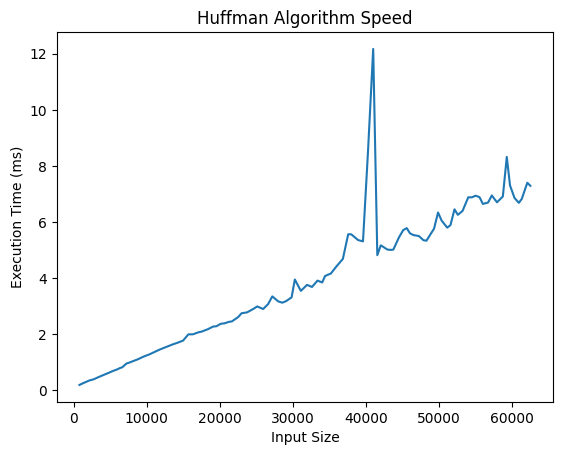

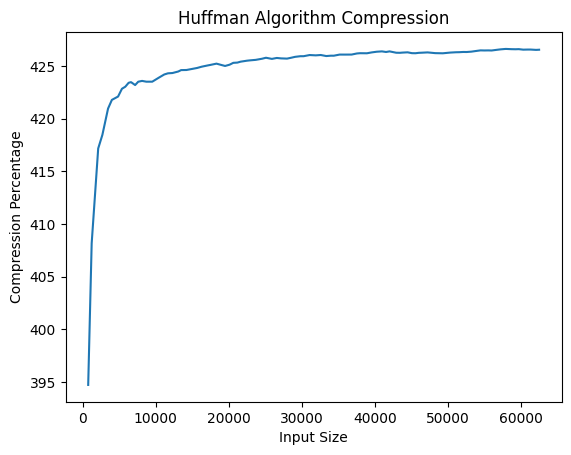

In [74]:
import matplotlib.pyplot as plt
import time
import sys

huffman_code = Huffman()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("/Users/novabucha/Desktop/код/first_year/second_semester/text2.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = huffman_code.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Huffman Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('Huffman Algorithm Compression')
plt.show()

# Алгоритм LZW

In [75]:
class LZW:
    def encode(self, text: str) -> tuple[str, dict]:

        def next_num():
            num = 0
            while True:
                yield num
                num += 1
        counter = next_num()
        starting_code = {s: next(counter) for s in sorted(list(set(text)))}
        coding_dict = starting_code.copy()
        result = []
        entry = ''
        while text:
            if (entry + text[0]) in coding_dict:
                entry += text[0]
            else:
                result.append(str(coding_dict[entry]))
                coding_dict[entry + text[0]] = next(counter)
                entry = text[0]
            text = text[1:]
        result.append(str(coding_dict[entry]))
        return (', '.join(result), starting_code)

    def decode(self, code: str, coding_dict: dict) -> str:
        decoding_dict = {coding_dict[x]: x for x in coding_dict}
        result = ''
        code = [int(el) for el in code.split(', ')]
        current_code = code[0]
        result += decoding_dict[current_code]
        for next_code in code[1:]:
            if next_code in decoding_dict:
                entry = decoding_dict[next_code]
            elif next_code == len(decoding_dict):
                entry = decoding_dict[current_code][0] + decoding_dict[current_code][0]
            else:
                raise ValueError("Invalid LZW code")
            result += entry
            decoding_dict[len(decoding_dict)] = decoding_dict[current_code] + entry[0]
            current_code = next_code
        return result

lzw = LZW()
print((code := lzw.encode((text :='I am going to do it. I have made up my mind. \n\
These are the first few words of the new… the best … the Longest Text In The Entire History Of The Known Universe! \n\
This Has To Have Over 35,000 words the beat the current world record set by that person who made that flaming chicken \n\
handbooky thingy. I might just be saying random things the whole time I type in this so you might get confused a lot. \n\
I just discovered something terrible. autocorrect is on!! no!!!'))))
print('-----------------------')
print(lzw.decode(*code))
print(text == lzw.decode(*code))


('10, 1, 16, 28, 1, 22, 30, 24, 29, 22, 1, 34, 30, 1, 19, 53, 24, 34, 4, 1, 41, 23, 16, 36, 20, 1, 28, 16, 19, 65, 35, 31, 66, 39, 66, 48, 19, 59, 0, 14, 23, 20, 33, 65, 16, 32, 65, 34, 81, 1, 21, 24, 32, 33, 34, 90, 20, 37, 1, 37, 30, 32, 19, 33, 1, 30, 21, 51, 89, 29, 97, 40, 108, 65, 17, 82, 95, 112, 88, 65, 12, 30, 49, 116, 1, 14, 20, 38, 95, 10, 29, 125, 89, 8, 29, 34, 92, 65, 9, 24, 94, 101, 74, 13, 107, 80, 65, 11, 29, 30, 37, 131, 15, 29, 24, 64, 93, 20, 2, 1, 79, 23, 140, 1, 9, 16, 104, 14, 53, 165, 64, 1, 13, 156, 1, 6, 7, 3, 5, 179, 99, 101, 103, 113, 1, 115, 16, 95, 119, 1, 18, 35, 32, 86, 135, 181, 32, 27, 19, 1, 86, 18, 182, 1, 83, 95, 17, 74, 88, 187, 1, 31, 20, 93, 122, 99, 23, 53, 67, 69, 108, 210, 21, 27, 43, 48, 50, 18, 162, 18, 26, 20, 131, 0, 62, 29, 19, 17, 30, 30, 26, 208, 162, 49, 39, 59, 41, 28, 24, 22, 23, 95, 25, 35, 94, 185, 65, 33, 16, 39, 226, 200, 16, 236, 30, 44, 88, 226, 104, 189, 37, 217, 27, 87, 24, 28, 65, 41, 34, 39, 212, 1, 48, 108, 163, 33, 53, 39

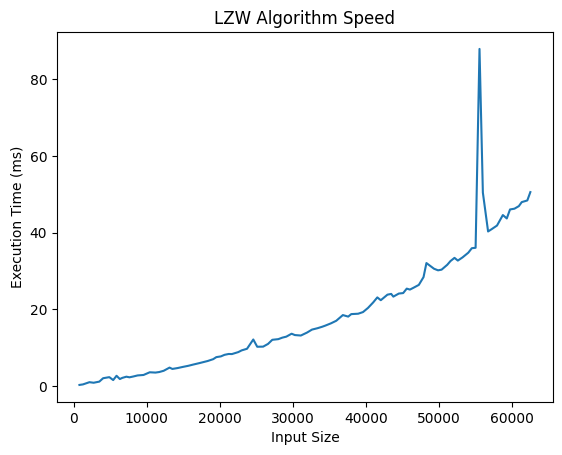

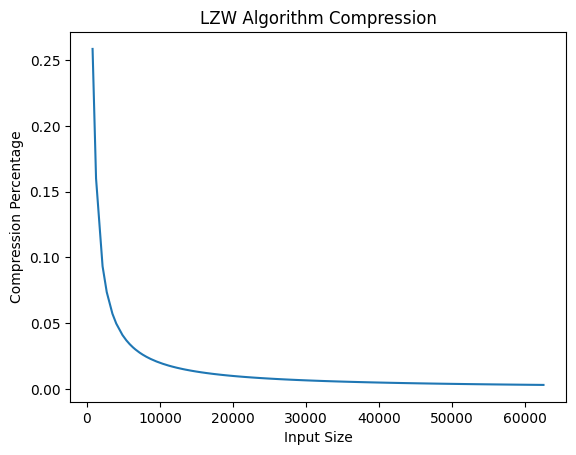

In [76]:
import matplotlib.pyplot as plt
import time
import sys

lzw = LZW()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("/Users/novabucha/Desktop/код/first_year/second_semester/text2.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = lzw.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('LZW Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('LZW Algorithm Compression')
plt.show()

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [77]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buf_size = buffer_size

    def encode(self, text: str) -> str:
        result = []
        cursor = 0
        while cursor < len(text):
            offset = -1
            copy_len = -1
            matched = ''
            for length in range(1, min(len(text)-cursor, self.buf_size)):
                entry = text[cursor : cursor+length]
                current_offset = text.rfind(entry, max(0, cursor-self.buf_size), cursor)
                if current_offset != -1 and length > copy_len:
                    offset = cursor - current_offset
                    copy_len = length
                    matched = entry
            if matched:
                result.append((offset, copy_len, text[cursor + copy_len]))
                cursor += copy_len + 1
            else:
                result.append((0, 0, text[cursor]))
                cursor += 1
        return self._list2text(result)

    def decode(self, code: str) -> str:
        code = self._text2list(code)
        result = ''
        cursor = 0
        while cursor < len(code):
            offset, length, end = code[cursor]
            if offset == 0:
                result += end
                cursor += 1
            else:
                start = len(result) - offset
                for i in range(length):
                    result += result[start + i]
                result += end
                cursor += 1
        return result

    def _text2list(self, string:str):
        return [(int(el.split(',')[0]), int(el.split(',')[1]), el.split(',')[2]) for el in string.split('|')]

    def _list2text(self, lst: list):
        return '|'.join([','.join([str(s) for s in el]) for el in lst])



lz77 = LZ77(5)
res = lz77.encode((text:='abcabacaaacbacabaacaacba'))
print(res)
print('-----------------------')
print(lz77.decode(res))
print(text == lz77.decode(res))

0,0,a|0,0,b|0,0,c|3,2,a|4,2,a|4,2,b|3,2,a|4,2,a|5,2,a|3,1,b|0,0,a
-----------------------
abcabacaaacbacabaacaacba
True


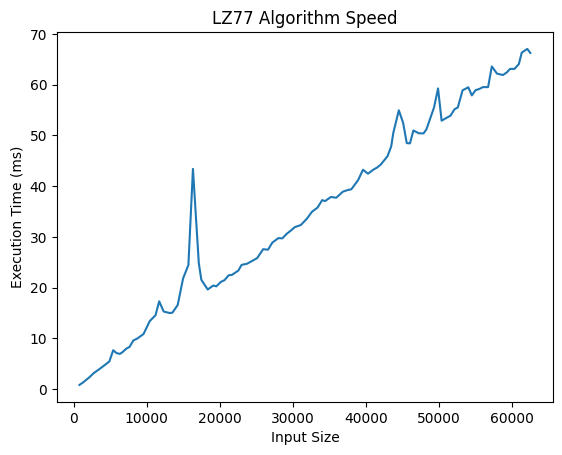

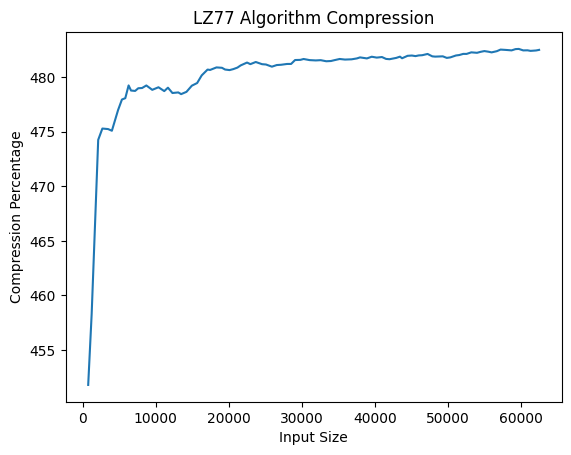

In [78]:
import matplotlib.pyplot as plt
import time
import sys

lz77 = LZ77(5)
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("/Users/novabucha/Desktop/код/first_year/second_semester/text2.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = lz77.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('LZ77 Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('LZ77 Algorithm Compression')
plt.show()

# Алгоритм Deflate

In [79]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.huffman = Huffman()
        self.lz77 = LZ77(buffer_size)

    def encode(self, text: str) -> str:
        res = self.huffman.encode(self.lz77.encode(text))
        return res

    def decode(self, code: str, code_dict: dict) -> str:
        res = self.lz77.decode("".join(self.huffman.decode(code, code_dict)))
        return res

In [80]:
defl = Deflate(5)
res = defl.encode((text:='abcabacaaacbacabaacaacba'))
print(res)
print('-----------------------')
print(defl.decode(res, defl.huffman.get_dict(defl.lz77.encode(text))))

print(text == defl.decode(res, defl.huffman.get_dict(defl.lz77.encode(text))))

1001110011011101100111001100011011001110011001001010000110101101110100111101011011101001111010110001101000011010110111010011110101101110100101111010110111010000110010101100011011001110011011
-----------------------
abcabacaaacbacabaacaacba
True


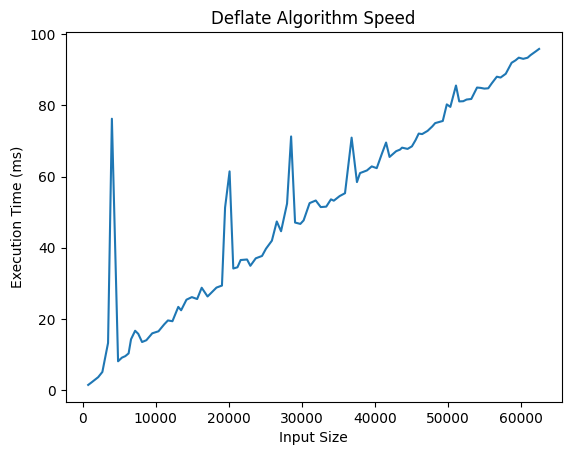

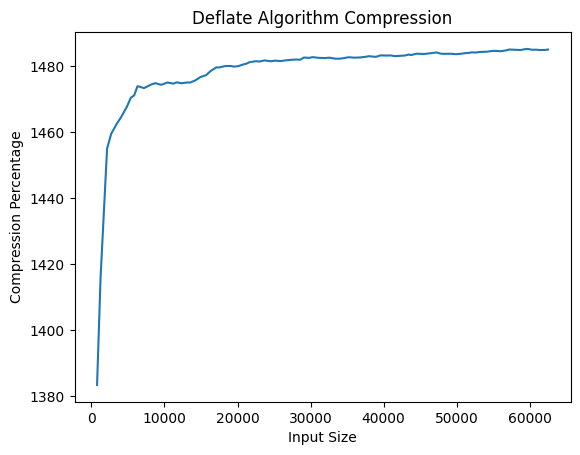

In [81]:
import matplotlib.pyplot as plt
import time
import sys

deflate = Deflate(5)
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("/Users/novabucha/Desktop/код/first_year/second_semester/text2.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = deflate.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Deflate Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('Deflate Algorithm Compression')
plt.show()

Висновок: LZW найкращий в стисненні коду, а Гаффман найшвидший, подвійне кодування в Дефлейті цікаве, але потребує того ж, що і алгоритм гаффмана для декодування